<a href="https://colab.research.google.com/github/Dias04404/sistemas-energia-eolica/blob/main/Atividade_03_Caico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Estimativa dos parâmetros e cálculo da Potência*

## DataSet

In [ ]:
#### IMPORTAR BIBLIOTECAS ####
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore') # Ignora warnings no github

#### IMPORTAR DADOS ####
from google.colab import drive
drive.mount('/content/drive')
pasta = '/content/drive/MyDrive/eolica/caico' # DEFINIR PASTA COM OS CSVs

#### CRIA LISTAS ####
arquivos = [f for f in os.listdir(pasta) if f.lower().endswith('.csv')]
lista_df = [] # LISTA COM DATAFRAMES
colunas_remover = [ # LISTA COM COLUNAS PARA REMOVER
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (KJ/m²)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'Unnamed: 19',
    'Hora UTC', ''  # caso apareça
]

#### PREPARAÇÃO DOS CASOS ESPECIAIS ####
def ler_arquivo_inmet(caminho): # FUNÇÃO PARA LER E NORMALIZAR ARQUIVOS A PARTIR DE 2019
    with open(caminho, 'r', encoding='latin1') as f:  # CODIFICA PARA LEITURA DOS ARQUIVOS
        linhas = f.readlines()[8:]  # PULA OS METADADOS
        linhas = [linha.strip() for linha in linhas if linha.strip()]
    dados = [linha.split(';') for linha in linhas]  # CONVERTE O SEPARADOR DE COLUNAS
    df = pd.DataFrame(dados)
    colunas = df.iloc[0]  # TRANSFORMA A PRIMEIRA LINHA EM NOME DAS COLUNAS
    df = df[1:]  # REMOVE A PRIMEIRA LINHA DO DF
    df.columns = colunas
    df = df.loc[:, ~df.columns.duplicated()]
    df.drop(columns=[col for col in colunas_remover if col in df.columns], inplace=True)  # REMOVE LISTA DE COLUNAS
    return df

#### PROCESSAR ARQUIVOS ####
for arquivo in arquivos:
    caminho = os.path.join(pasta, arquivo)
    try:
        # VERIFICA SE O ARQUIVO É DE 2019 OU MAIS RECENTE
        if any(ano in arquivo for ano in ['2019', '2020', '2021', '2022', '2023', '2024']):
            df = ler_arquivo_inmet(caminho) # RODA A FUNÇÃO
        else:
            df = pd.read_csv(
                caminho,
                skiprows=8,
                encoding='latin1',
                sep=';',
                decimal=',',
                on_bad_lines='skip'
            )
            df = df.loc[:, ~df.columns.duplicated()]
            df.drop(columns=[col for col in colunas_remover if col in df.columns], inplace=True)

        # RENOMEIA A COLUNA DE DATA
        if 'DATA (YYYY-MM-DD)' in df.columns:
            df.rename(columns={'DATA (YYYY-MM-DD)': 'Data'}, inplace=True)
        # RENOMEIA A COLUNA DE VELOCIDADE
        if 'VENTO, VELOCIDADE HORARIA (m/s)' in df.columns:
            df.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
        # RENOMEIA A COLUNA DE VELOCIDADE MÁX
        if 'VENTO, RAJADA MAXIMA (m/s)' in df.columns:
            df.rename(columns={'VENTO, RAJADA MAXIMA (m/s)': 'VELOCIDADE MÁX (m/s)'}, inplace=True)

        # CONVERTE PARA DATETIME E CRIA COLUNAS ANO/MÊS/DIA
        df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

        df['Ano'] = df['Data'].dt.year
        df['Mês'] = df['Data'].dt.month
        df['Dia'] = df['Data'].dt.day

        # TRATA VALORES 9999 COMO NaN
        df.replace('-9999', pd.NA, inplace=True)
        df.replace('-9999.0', pd.NA, inplace=True)

        lista_df.append(df) # ADICIONA O DF A LISTA

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

#### CONCATENAR TODOS OS DATAFRAMES ####
df_final = pd.concat(lista_df, ignore_index=True)
caminho_saida = '/content/drive/MyDrive/eolica/dados_caico.csv'
df_final.to_csv(caminho_saida, index=False) # SALVAR COMO CSV FINAL

#### EXIBIR INFOS FINAIS ####
print("Colunas finais:", df_final.columns.tolist())
df_final

Mounted at /content/drive
Colunas finais: ['Data', 'HORA (UTC)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VELOCIDADE MÁX (m/s)', 'VELOCIDADE (m/s)', 'Ano', 'Mês', 'Dia']


,Data,HORA (UTC),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))",VELOCIDADE MÁX (m/s),VELOCIDADE (m/s),Ano,Mês,Dia
0,2015-01-01,00:00,127,8.7,4.6,2015,1,1
1,2015-01-01,01:00,107,7.9,3.2,2015,1,1
2,2015-01-01,02:00,90,8.4,3.2,2015,1,1
3,2015-01-01,03:00,90,8.2,3.0,2015,1,1
4,2015-01-01,04:00,109,9.0,3.3,2015,1,1
...,...,...,...,...,...,...,...,...
87667,2024-12-31,NaN,66,"6,6","2,9",2024,12,31
87668,2024-12-31,NaN,69,"8,3","2,1",2024,12,31
87669,2024-12-31,NaN,55,"5,9","2,6",2024,12,31
87670,2024-12-31,NaN,54,"6,8","2,7",2024,12,31


In [ ]:
# Lista os valores de velocidade no DF
velocidades = df_final['VELOCIDADE (m/s)'].unique()
print(velocidades)

# Função para converter elementos
def converter_valor(valor):
    try:
        if isinstance(valor, str):
            valor = valor.replace(',', '.').strip()
        return float(valor)
    except:
        return None

v_convertidos = [converter_valor(v) for v in velocidades] # APLICA FUNÇÃO NA LISTA
v_filtrados = [v for v in v_convertidos if v is not None and v != -9999.0] # FILTRA VALOR
print("\n\n\n", v_filtrados)

[4.6 3.2 3.0 3.3 1.4 2.2 2.3 2.4 4.3 5.3 3.4 5.4 1.8 1.5 2.1 0.6 0.9 2.0
 2.7 1.3 2.8 5.2 4.2 3.7 2.5 1.7 1.9 3.5 3.6 6.8 6.3 3.9 4.4 3.8 4.0 1.2
 2.9 1.1 5.9 1.6 3.1 2.6 0.5 4.7 5.7 4.5 5.0 5.5 4.1 4.8 0.8 6.1 7.0 5.8
 6.4 4.9 5.1 6.7 6.5 7.2 1.0 6.0 6.9 7.4 7.3 6.6 0.7 5.6 0.4 0.3 9.4 0.2
 0.1 7.9 6.2 7.6 7.1 7.5 7.7 8.0 8.7 -9999.0 8.3 7.8 8.8 8.1 8.6 '3,1'
 '2,9' '2,7' '3,6' '3' '1,6' '1,7' '1,9' '1,4' '1,3' '3,2' '3,5' '4,3'
 '3,3' '4,9' '4' '4,6' '3,9' '4,5' '5,6' '4,7' '5,4' '5,5' '5,9' '5' '3,8'
 '2,6' '4,1' '4,2' '2,5' '5,2' '2,8' '2,1' '2,2' '3,7' '2,3' '2' ',8'
 '1,1' '4,4' '1' '1,2' ',3' ',9' ',6' '1,8' '1,5' '2,4' '3,4' ',5' ',7'
 ',4' '5,8' '4,8' ',2' '5,1' '6,5' '5,7' '6,6' '6,1' '8,1' '5,3' '7,2'
 ',1' '6' '6,9' '6,8' '6,2' '6,3' '6,4' '6,7' '7,1' '7,3' '7,6' '7' '']



 [4.6, 3.2, 3.0, 3.3, 1.4, 2.2, 2.3, 2.4, 4.3, 5.3, 3.4, 5.4, 1.8, 1.5, 2.1, 0.6, 0.9, 2.0, 2.7, 1.3, 2.8, 5.2, 4.2, 3.7, 2.5, 1.7, 1.9, 3.5, 3.6, 6.8, 6.3, 3.9, 4.4, 3.8, 4.0, 1.2, 2.9, 1.1, 5.9, 1.6, 3

# Tarefa 07

Calcular os parâmetros de Weibull por pelo menos 3 métodos, para as duas localidades trabalhadas na Tarefa 5 e para os dois anos diferentes considerados.

**Caicó e Mossoró**

*   2015
*   2024

**Métodos Escolhidos:**


- Método da Energia Padrão
    
- Método do Momento

- Método da Máxima Verossimilhança
    


In [ ]:
# USANDO TODOS METODOS - COD GPT


# Método da Energia Padrão


import numpy as np
from scipy.special import gamma
from scipy.optimize import minimize

# Lista os valores de velocidade
velocidades = np.array(v_filtrados)

# Cálculo da energia observada
energia_obs = np.mean(velocidades ** 3)
media_obs = np.mean(velocidades)

# Função de erro: diferença entre energia e média teórica e observada
def erro_energia(params):
    k, c = params
    if k <= 0 or c <= 0:
        return np.inf
    energia_teo = c**3 * gamma(1 + 3 / k)
    media_teo = c * gamma(1 + 1 / k)
    erro_energia = (energia_obs - energia_teo)**2
    erro_media = (media_obs - media_teo)**2
    return erro_energia + erro_media  # ou pesar diferente se preferir

# Estimativa inicial
res = minimize(erro_energia, x0=[2.0, 5.0], bounds=[(0.5, 10), (0.5, 20)])

k_energia, c_energia = res.x
print(f"Estimativa pelo Método da Energia Padrão -> k: {k_energia:.4f}, c: {c_energia:.4f}")


# Método do Momento


from scipy.special import gamma
from scipy.optimize import minimize_scalar

media = np.mean(velocidades)
variancia = np.var(velocidades)

def erro_momento(k):
    if k <= 0: return np.inf
    g1 = gamma(1 + 1/k)
    g2 = gamma(1 + 2/k)
    c_estimado = media / g1
    var_teorica = c_estimado**2 * (g2 - g1**2)
    return (variancia - var_teorica)**2

res = minimize_scalar(erro_momento, bounds=(0.1, 10), method='bounded')
k_mom = res.x
c_mom = media / gamma(1 + 1/k_mom)

print(f"Estimativa Método dos Momentos -> k: {k_mom:.4f}, c: {c_mom:.4f}")


# Método da Máxima Verossimilhança

import numpy as np
from scipy.stats import weibull_min

# Lista os valores de velocidade
velocidades = np.array(v_filtrados)

# Estimativa de parâmetros via MLE
shape_k, loc, scale_c = weibull_min.fit(velocidades, floc=0)  # loc fixado em 0

print(f"Estimativa MLE -> k (forma): {shape_k:.4f}, c (escala): {scale_c:.4f}")


Estimativa pelo Método da Energia Padrão -> k: 1.8875, c: 4.6306
Estimativa Método dos Momentos -> k: 1.7811, c: 4.6192
Estimativa MLE -> k (forma): 1.6530, c (escala): 4.5573


In [ ]:
# CALCULAR A MÉDIA

ks = [k_energia, k_mom, shape_k]
mediak = np.mean(ks)
print(f"Média K: {mediak}")

cs = [c_energia, c_mom, scale_c]
mediac = np.mean(cs)
print(f"Média C: {mediac}")


Média K: 1.7738731657270677
Média C: 4.6023624568466905


-------

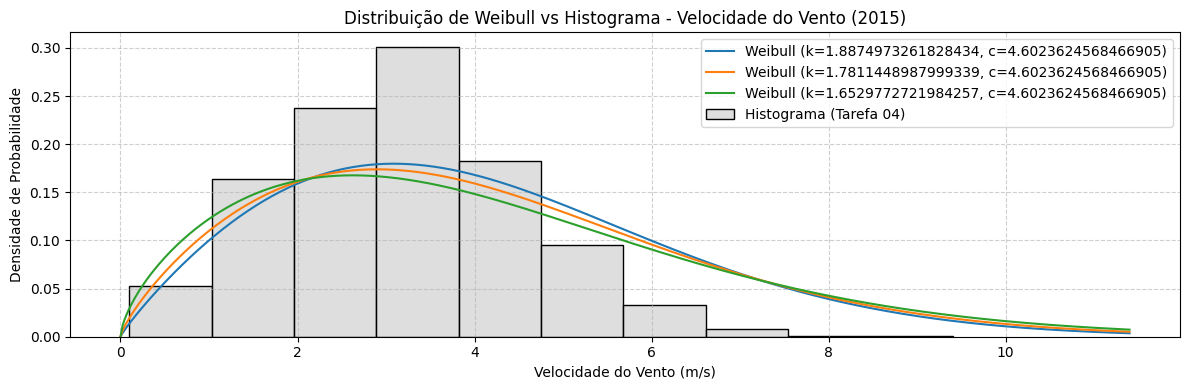

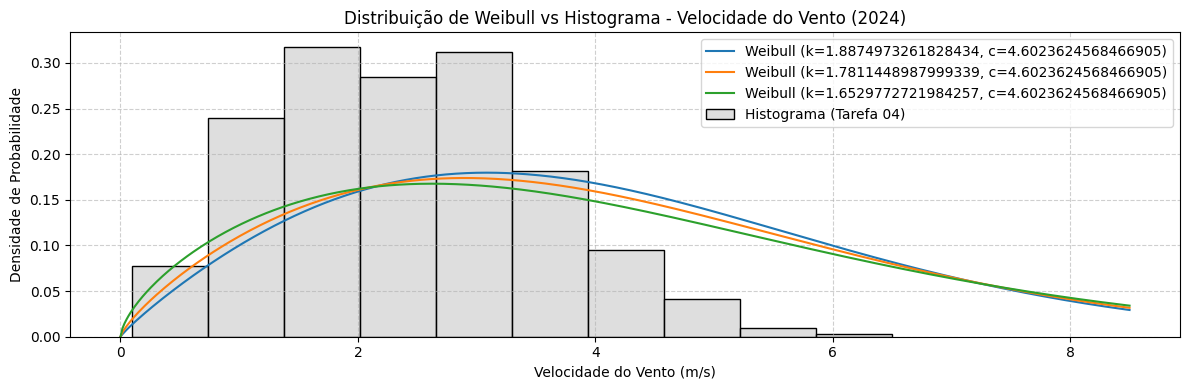

In [ ]:
# MODELAGEM 01 - Caicó

# Para C = Mediac

# IMPORTAÇÃO E LIMPEZA DAS COLUNAS

caminhos5 = {
    '2015': '/content/drive/MyDrive/eolica/caico/INMET_NE_RN_A316_CAICO_01-01-2015_A_31-12-2015.CSV',
    '2024': '/content/drive/MyDrive/eolica/caico/INMET_NE_RN_A316_CAICO_01-01-2024_A_31-12-2024.CSV'
}

colunas_remover5 = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (KJ/m²)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'Unnamed: 19',
    'Hora UTC', ''
]

# TRATAMENTO PARA CADA ANO

dfs51 = {}

for ano51, caminho5 in caminhos5.items():
    df51 = pd.read_csv(caminho5, skiprows=8, encoding='latin1', sep=';', decimal=',', on_bad_lines='skip')
    df51 = df51.loc[:, ~df51.columns.duplicated()]
    df51.drop(columns=[col for col in colunas_remover5 if col in df51.columns], inplace=True)
    if 'VENTO, VELOCIDADE HORARIA (m/s)' in df51.columns:
        df51.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
    df51['VELOCIDADE (m/s)'] = pd.to_numeric(df51['VELOCIDADE (m/s)'], errors='coerce')
    df51['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)
    df51['Ano'] = int(ano51)
    dfs51[ano51] = df51

dfs52 = {}

for ano52, caminho5 in caminhos5.items():
    df52 = pd.read_csv(caminho5, skiprows=8, encoding='latin1', sep=';', decimal=',', on_bad_lines='skip')
    df52 = df52.loc[:, ~df52.columns.duplicated()]
    df52.drop(columns=[col for col in colunas_remover5 if col in df52.columns], inplace=True)
    if 'VENTO, VELOCIDADE HORARIA (m/s)' in df52.columns:
        df52.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
    df52['VELOCIDADE (m/s)'] = pd.to_numeric(df52['VELOCIDADE (m/s)'], errors='coerce')
    df52['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)
    df52['Ano'] = int(ano52)
    dfs52[ano52] = df52

ano_escolhido51 = '2015'
dados51 = dfs51[ano_escolhido51]['VELOCIDADE (m/s)'].dropna()

ano_escolhido52 = '2024'
dados52 = dfs52[ano_escolhido52]['VELOCIDADE (m/s)'].dropna()

# DISTRIBUIIÇÃO DE WEIBULL

c = mediac  # Parâmetro de escala
k_values = [k_energia, k_mom, shape_k] # Parâmetro de forma

# Eixo x para a função PDF
x = np.linspace(0, dados51.max() + 2, 500)
x2 = np.linspace(0, dados52.max() + 2, 500)

# Função da PDF da Weibull
def weibull_pdf(x, k, c): # 2015
    return (k / c) * (x / c)**(k - 1) * np.exp(-(x / c)**k)
def weibull_pdf2(x2, k, c): # 2024
    return (k / c) * (x2 / c)**(k - 1) * np.exp(-(x2 / c)**k)


##############################  2015   #################################

# Plotar histograma relacionado
plt.figure(figsize=(12, 4))
sns.histplot(dados51, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma (Tarefa 04)')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf(x, k, c)
    plt.plot(x, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido51})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

##############################  2024   ################################

# Plotar histograma relacionado
plt.figure(figsize=(12,4))
sns.histplot(dados52, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma (Tarefa 04)')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf2(x2, k, c)
    plt.plot(x2, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido52})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

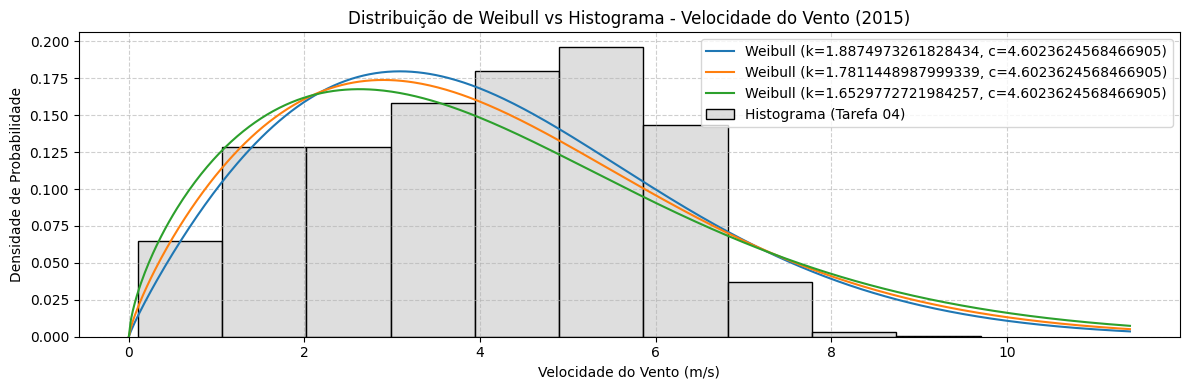

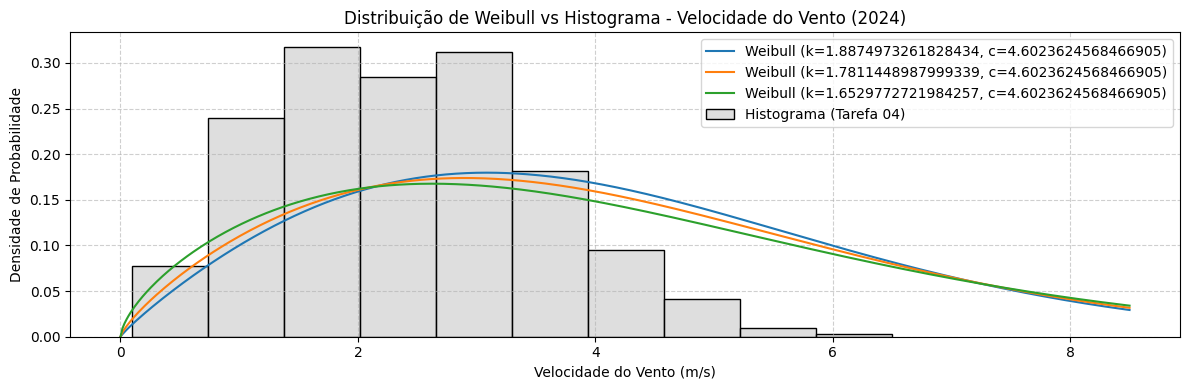

In [ ]:
# MODELAGEM 02 - Mossoró

# Para C = Mediac

# IMPORTAÇÃO E LIMPEZA DAS COLUNAS

caminhos6 = {
    '2015': '/content/drive/MyDrive/eolica/mossoro/INMET_NE_RN_A318_MOSSORO_01-01-2015_A_31-12-2015.CSV',
    '2024': '/content/drive/MyDrive/eolica/mossoro/INMET_NE_RN_A318_MOSSORO_01-01-2024_A_31-12-2024.CSV'
}


# TRATAMENTO PARA CADA ANO

dfs61 = {}

for ano61, caminho6 in caminhos6.items():
    df61 = pd.read_csv(caminho6, skiprows=8, encoding='latin1', sep=';', decimal=',', on_bad_lines='skip')
    df61 = df61.loc[:, ~df61.columns.duplicated()]
    df61.drop(columns=[col for col in colunas_remover5 if col in df61.columns], inplace=True)
    if 'VENTO, VELOCIDADE HORARIA (m/s)' in df61.columns:
        df61.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
    df61['VELOCIDADE (m/s)'] = pd.to_numeric(df61['VELOCIDADE (m/s)'], errors='coerce')
    df61['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)
    df61['Ano'] = int(ano61)
    dfs61[ano61] = df61

dfs62 = {}

for ano62, caminho6 in caminhos6.items():
    df62 = pd.read_csv(caminho5, skiprows=8, encoding='latin1', sep=';', decimal=',', on_bad_lines='skip')
    df62 = df62.loc[:, ~df62.columns.duplicated()]
    df62.drop(columns=[col for col in colunas_remover5 if col in df62.columns], inplace=True)
    if 'VENTO, VELOCIDADE HORARIA (m/s)' in df62.columns:
        df62.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
    df62['VELOCIDADE (m/s)'] = pd.to_numeric(df62['VELOCIDADE (m/s)'], errors='coerce')
    df62['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)
    df62['Ano'] = int(ano62)
    dfs62[ano62] = df62

ano_escolhido61 = '2015'
dados61 = dfs61[ano_escolhido61]['VELOCIDADE (m/s)'].dropna()

ano_escolhido62 = '2024'
dados62 = dfs62[ano_escolhido62]['VELOCIDADE (m/s)'].dropna()

# DISTRIBUIIÇÃO DE WEIBULL

c = mediac  # Parâmetro de escala
k_values = [k_energia, k_mom, shape_k] # Parâmetro de forma

# Eixo x para a função PDF
x6 = np.linspace(0, dados51.max() + 2, 500)
x62 = np.linspace(0, dados52.max() + 2, 500)

# Função da PDF da Weibull
def weibull_pdf(x6, k, c): # 2015
    return (k / c) * (x / c)**(k - 1) * np.exp(-(x / c)**k)
def weibull_pdf2(x62, k, c): # 2024
    return (k / c) * (x2 / c)**(k - 1) * np.exp(-(x2 / c)**k)


##############################  2015   #################################

# Plotar histograma relacionado
plt.figure(figsize=(12, 4))
sns.histplot(dados61, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma (Tarefa 04)')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf(x6, k, c)
    plt.plot(x6, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido51})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

##############################  2024   ################################

# Plotar histograma relacionado
plt.figure(figsize=(12,4))
sns.histplot(dados62, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma (Tarefa 04)')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf2(x62, k, c)
    plt.plot(x62, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido52})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

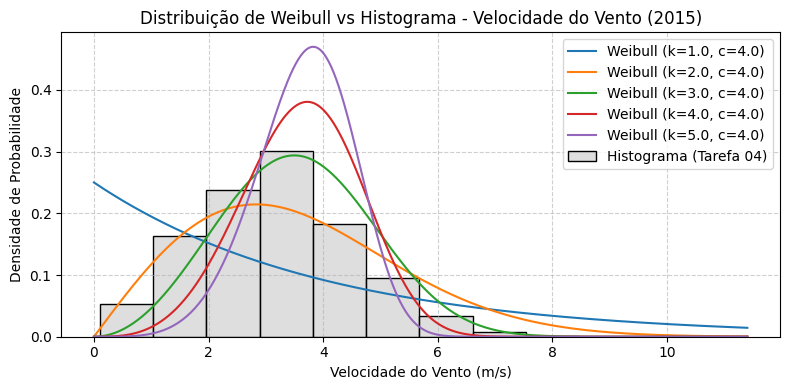

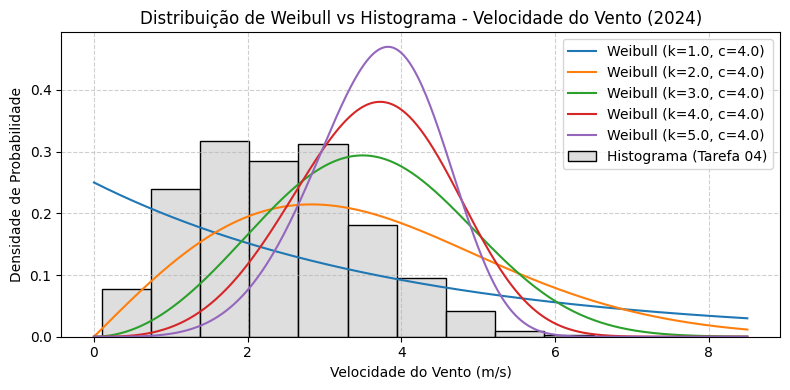

In [ ]:
# MODELAGEM 02

# Para C = 4.0

# DISTRIBUIIÇÃO DE WEIBULL

c = 4.0  # Parâmetro de escala
k_values = [1.0, 2.0, 3.0, 4.0, 5.0] # Parâmetro de forma

# Eixo x para a função PDF
x = np.linspace(0, dados51.max() + 2, 500)
x2 = np.linspace(0, dados52.max() + 2, 500)

# Função da PDF da Weibull
def weibull_pdf(x, k, c): # 2015
    return (k / c) * (x / c)**(k - 1) * np.exp(-(x / c)**k)
def weibull_pdf2(x2, k, c): # 2024
    return (k / c) * (x2 / c)**(k - 1) * np.exp(-(x2 / c)**k)


##############################  2015   #################################

# Plotar histograma relacionado
plt.figure(figsize=(8, 4))
sns.histplot(dados51, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma (Tarefa 04)')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf(x, k, c)
    plt.plot(x, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido51})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

##############################  2024   ################################

# Plotar histograma relacionado
plt.figure(figsize=(8,4))
sns.histplot(dados52, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma (Tarefa 04)')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf2(x2, k, c)
    plt.plot(x2, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido52})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

# Tarefa 06

Considerar uma outra localidade, nos mesmos anos, e traçar a curva de Weibull,
considerando os mesmos 3 diferentes tipos de k para cada c considerado da questão
anterior.


**Mossoró**

*   2015
*   2024